In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn

#Student Placement Machine Learning Model

#Import Libraries and Load the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as K_neighbors



from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score


import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv('/content/drive/My Drive/dataset1 - dataset1.csv')
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [ ]:
df.shape

(5935, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5935 entries, 0 to 5934
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                5935 non-null   object
 1   Gender             5933 non-null   object
 2   Stream             5933 non-null   object
 3   Internships        5933 non-null   object
 4   CGPA               5933 non-null   object
 5   Hostel             5933 non-null   object
 6   HistoryOfBacklogs  5933 non-null   object
 7   PlacedOrNot        5933 non-null   object
dtypes: object(8)
memory usage: 371.1+ KB


In [ ]:
df.describe().T

,count,unique,top,freq
Age,5935,14,21,2168
Gender,5933,3,Male,4950
Stream,5933,7,Computer Science,1552
Internships,5933,5,0,2662
CGPA,5933,6,7,1912
Hostel,5933,3,0,4336
HistoryOfBacklogs,5933,3,0,4792
PlacedOrNot,5933,3,1,3278


In [ ]:
df.isnull().sum()

,0
Age,0
Gender,2
Stream,2
Internships,2
CGPA,2
Hostel,2
HistoryOfBacklogs,2
PlacedOrNot,2


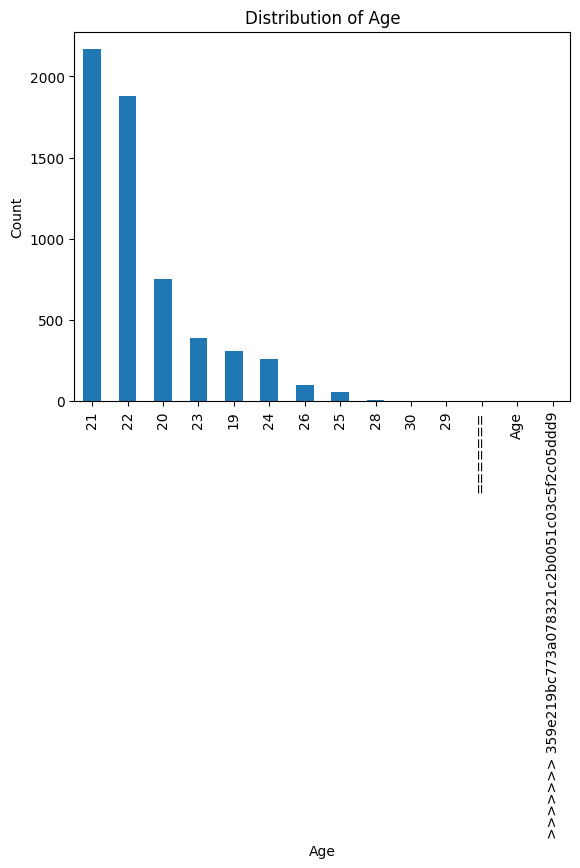

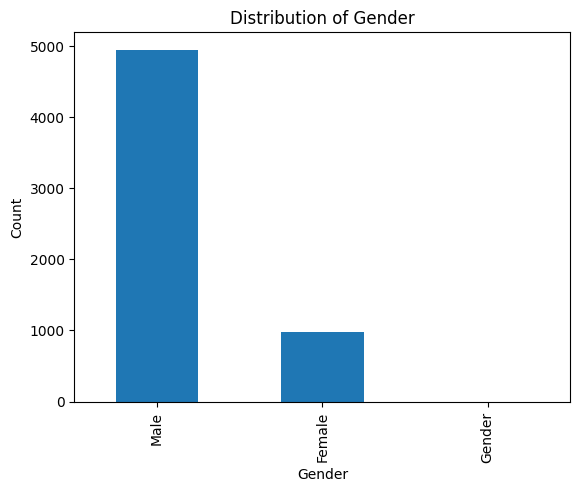

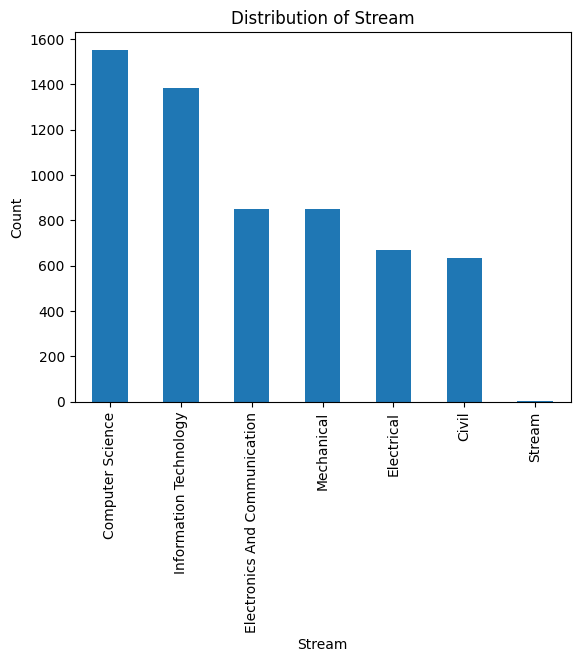

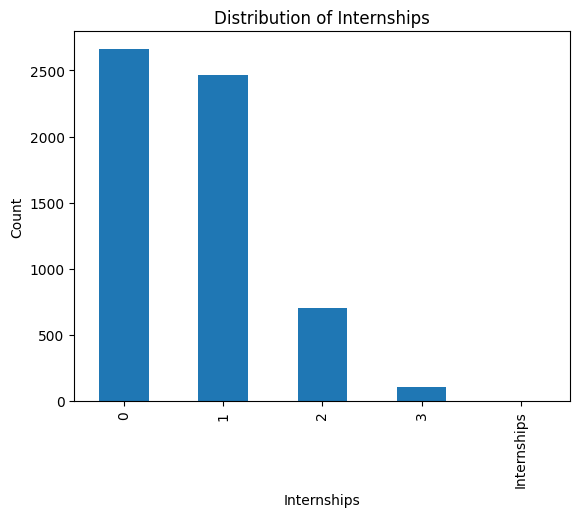

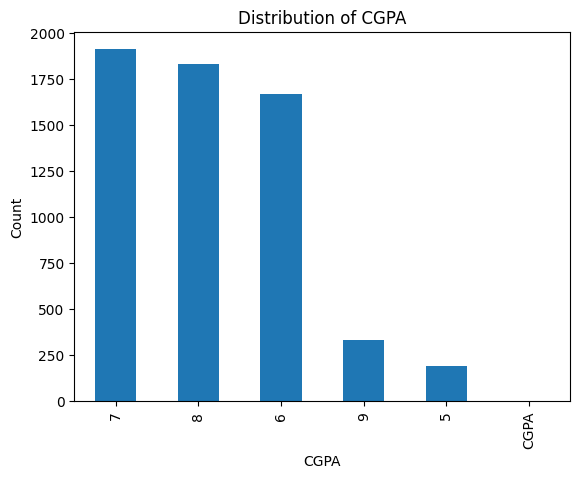

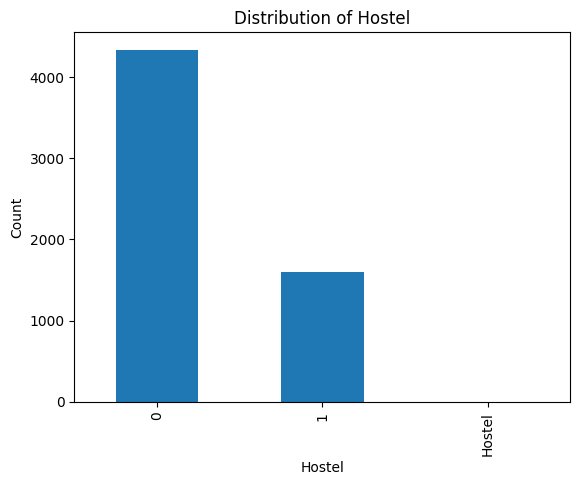

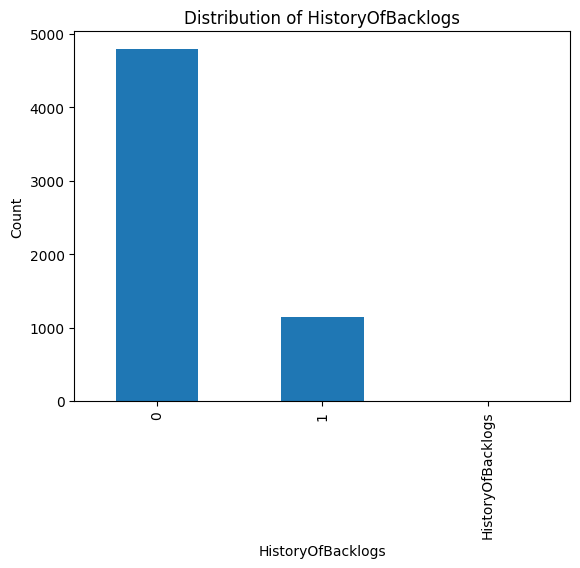

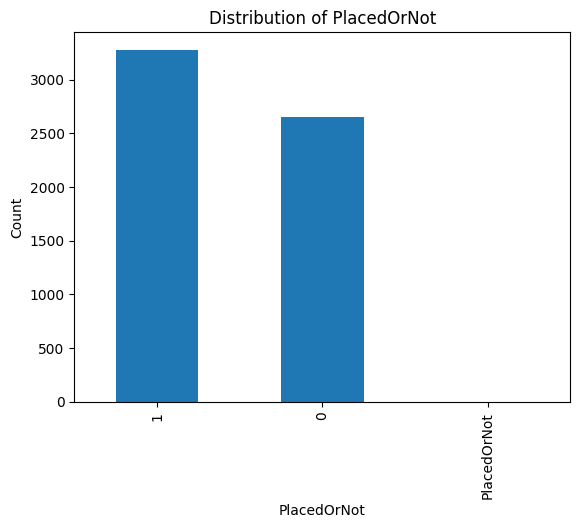

In [ ]:
# Loop through all columns and get distribution
for col in df.columns:
    if df[col].dtype == 'object':  # If the column is categorical
        df[col].value_counts().plot(kind='bar', title=f"Distribution of {col}")
        plt.ylabel('Count')
        plt.show()
    else:  # If the column is numerical
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"Distribution of {col}")
        plt.show()

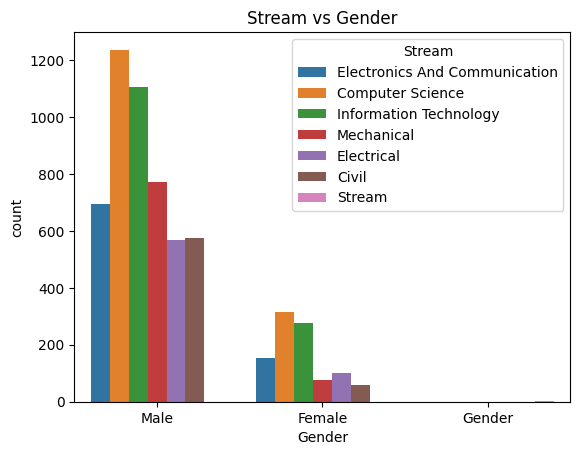

In [ ]:

sns.countplot(x='Gender', hue='Stream', data=df, orient = 'h')
plt.title('Stream vs Gender')
plt.show()

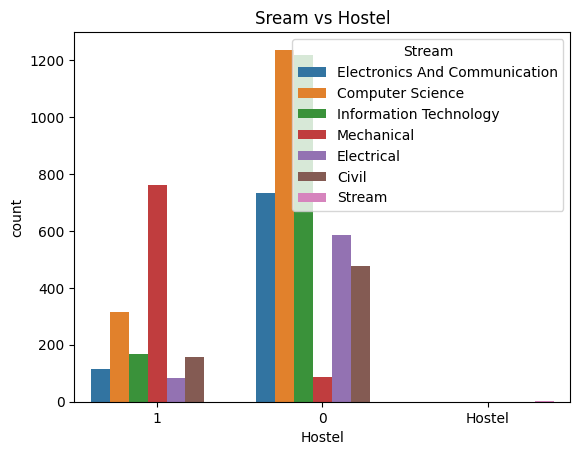

In [ ]:
sns.countplot(x='Hostel', hue='Stream', data=df, orient = 'h')
plt.title('Sream vs Hostel')
plt.show()

#Data Preprocessing

##Data Cleaning

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5933 entries, 0 to 5933
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                5933 non-null   object
 1   Gender             5933 non-null   object
 2   Stream             5933 non-null   object
 3   Internships        5933 non-null   object
 4   CGPA               5933 non-null   object
 5   Hostel             5933 non-null   object
 6   HistoryOfBacklogs  5933 non-null   object
 7   PlacedOrNot        5933 non-null   object
dtypes: object(8)
memory usage: 417.2+ KB


##Encoding Categorical Values

In [ ]:
print(df['Stream'].unique())
print(df['Gender'].unique())
print(df['Internships'].unique())
print(df['Hostel'].unique())
print(df['HistoryOfBacklogs'].unique())
print(df['PlacedOrNot'].unique())


['Electronics And Communication' 'Computer Science'
 'Information Technology' 'Mechanical' 'Electrical' 'Civil' 'Stream']
['Male' 'Female' 'Gender']
['1' '0' '2' '3' 'Internships']
['1' '0' 'Hostel']
['1' '0' 'HistoryOfBacklogs']
['1' '0' 'PlacedOrNot']


In [ ]:
le = LabelEncoder()
df.Gender = le.fit_transform(df['Gender'])
df.Stream = le.fit_transform(df.Stream)


df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
df["Gender"] = pd.to_numeric(df["Gender"], errors='coerce')
df["Stream"] = pd.to_numeric(df["Stream"], errors='coerce')
df["Internships"] = pd.to_numeric(df["Internships"], errors='coerce')
df["CGPA"] = pd.to_numeric(df["CGPA"], errors='coerce')
df["Hostel"] = pd.to_numeric(df["Hostel"], errors='coerce')
df["HistoryOfBacklogs"] = pd.to_numeric(df["HistoryOfBacklogs"], errors='coerce')
df["PlacedOrNot"] = pd.to_numeric(df["PlacedOrNot"], errors='coerce')


df = df.dropna()



print(df.dtypes)

Age                  float64
Gender                 int64
Stream                 int64
Internships          float64
CGPA                 float64
Hostel               float64
HistoryOfBacklogs    float64
PlacedOrNot          float64
dtype: object


##Scaling features

In [ ]:
scalr = MinMaxScaler()
df[['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']] = scalr.fit_transform(df[['Age', 'Internships', 'CGPA', 'Hostel', 'HistoryOfBacklogs']])

#Data Exploration

Text(0.5, 1.0, 'Correlation Matrix')

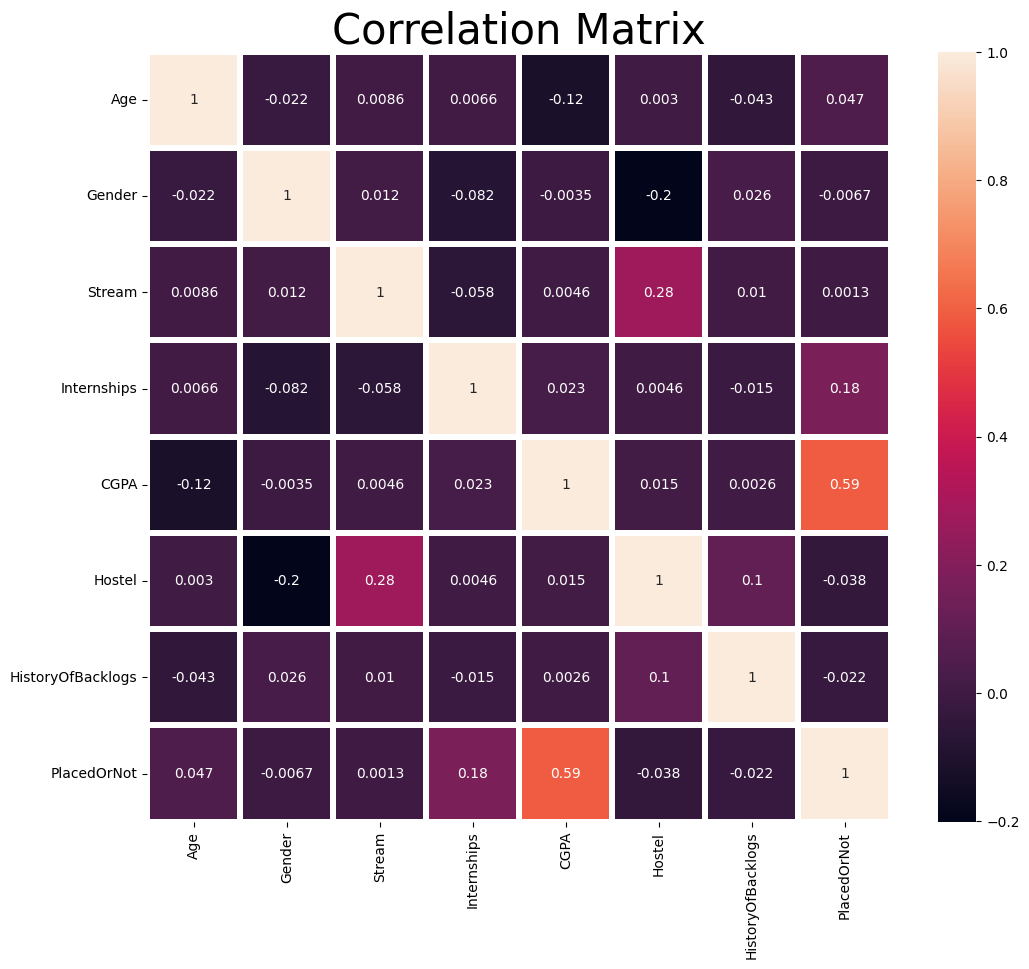

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',linewidths=4)
plt.title('Correlation Matrix',fontsize=30)

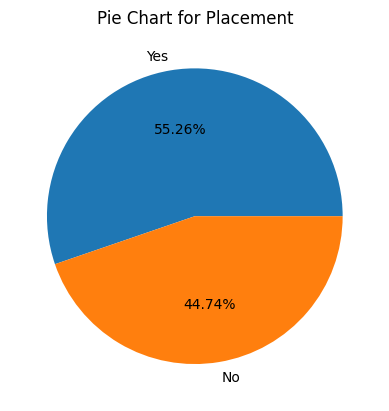

In [ ]:
target_val = df['PlacedOrNot'].value_counts()
target_label = ['Yes', 'No']
plt.pie(target_val, labels = target_label, autopct = '%.2f%%')
plt.title('Pie Chart for Placement');

Text(0.5, 1.0, 'Average of age by outcomes ')

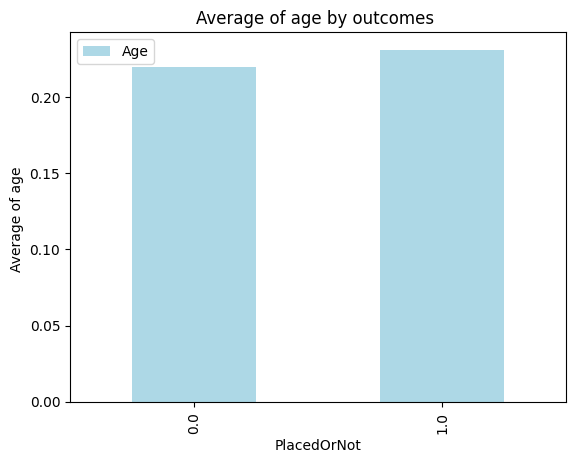

In [ ]:
age_gr = df.groupby('PlacedOrNot')['Age'].mean()

pd.DataFrame(age_gr).plot.bar(color='lightblue')
plt.ylabel('Average of age ')
plt.title('Average of age by outcomes ')

<Axes: xlabel='PlacedOrNot'>

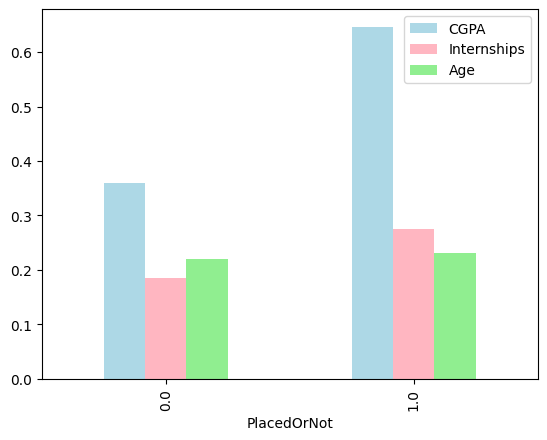

In [ ]:
outcome_group=df.groupby('PlacedOrNot')[['CGPA', 'Internships', 'Age']].mean()
outcome_group.plot.bar(color=['lightblue','lightpink','lightgreen'])

<Axes: >

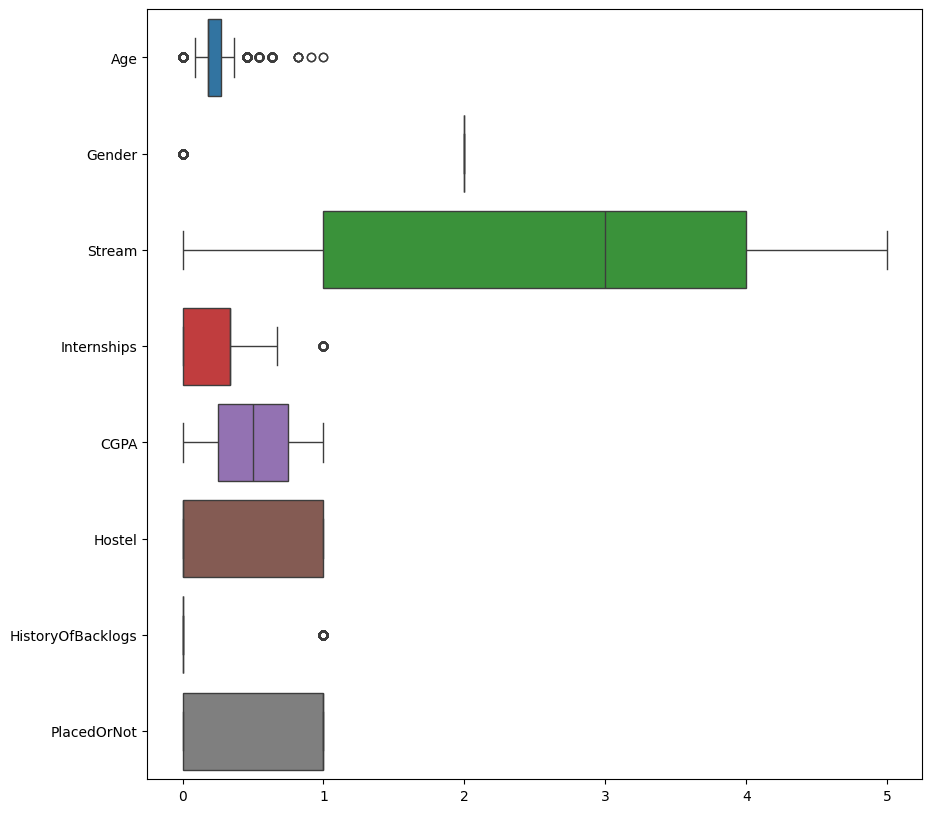

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(df,orient='h')

#Preparation

##Separate X and y

In [ ]:
X = df.drop('PlacedOrNot', axis=1)
y = df['PlacedOrNot']

##Split the **Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Model Building

##Logistic Regression

###Training the model

In [ ]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression()

###Apply the model to make a prediction

In [ ]:
LogReg_train_pred = LogReg.predict(X_train)
LogReg_test_pred = LogReg.predict(X_test)

###Evaluate model Performance

In [ ]:
LogReg_train_acc = accuracy_score(y_train, LogReg_train_pred)
LogReg_train_pred_score = precision_score (y_train, LogReg_train_pred)
LogReg_train_recall_score = recall_score (y_train, LogReg_train_pred)
LogReg_train_f1_score = f1_score (y_train, LogReg_train_pred)

LogReg_test_acc = accuracy_score(y_test, LogReg_test_pred)
LogReg_test_pred_score = precision_score(y_test, LogReg_test_pred)
LogReg_test_recall_score = recall_score(y_test, LogReg_test_pred)
LogReg_test_f1_score = f1_score(y_test, LogReg_test_pred)

'''print('Training Accuracy:', LogReg_train_acc)
print('Training Precision:', LogReg_train_pred_score)
print('Training Recall:', LogReg_train_recall_score)
print('Training F1 Score:', LogReg_train_f1_score)'''
print('Testing Accuracy:', LogReg_test_acc)
print('Testing Precision:', LogReg_test_pred_score)
print('Testing Recall:', LogReg_test_recall_score)
print('Testing F1 Score:', LogReg_test_f1_score)


Testing Accuracy: 0.7649536647009267
Testing Precision: 0.7861356932153393
Testing Recall: 0.7991004497751124
Testing F1 Score: 0.7925650557620819


In [ ]:
lr_results = pd.DataFrame(['Logistic Regression', LogReg_test_acc, LogReg_test_pred_score, LogReg_test_recall_score, LogReg_test_f1_score]).transpose()
lr_results.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
lr_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.764954,0.786136,0.7991,0.792565


##Decision Trees

###Training the model

In [ ]:
Dt = DecisionTreeClassifier()
Dt.fit(X_train, y_train)

DecisionTreeClassifier()

###Apply the model to make a prediction

In [ ]:
Dt_train_pred = Dt.predict(X_train)
Dt_test_pred = Dt.predict(X_test)

###Evaluate the model Performance

In [ ]:
Dt_train_acc = accuracy_score(y_train, Dt_train_pred)
Dt_train_pred_score = precision_score (y_train, Dt_train_pred)
Dt_train_recall_score = recall_score (y_train, Dt_train_pred)
Dt_train_f1_score = f1_score (y_train, Dt_train_pred)

Dt_test_acc = accuracy_score(y_test, Dt_test_pred)
Dt_test_pred_score = precision_score(y_test, Dt_test_pred)
Dt_test_recall_score = recall_score(y_test, Dt_test_pred)
Dt_test_f1_score = f1_score(y_test, Dt_test_pred)

'''print('Training Accuracy:', Dt_train_acc)
print('Training Precision:', Dt_train_pred_score)
print('Training Recall:', Dt_train_recall_score)
print('Training F1 Score:', Dt_train_f1_score)'''
print('Testing Accuracy:', Dt_test_acc)
print('Testing Precision:', Dt_test_pred_score)
print('Testing Recall:', Dt_test_recall_score)
print('Testing F1 Score:', Dt_test_f1_score)




Testing Accuracy: 0.9149115417017691
Testing Precision: 0.9624183006535948
Testing Recall: 0.8830584707646177
Testing F1 Score: 0.9210320562939797


In [ ]:
Dt_results = pd.DataFrame(['Decision Tree', Dt_test_acc, Dt_test_pred_score, Dt_test_recall_score, Dt_test_f1_score]).transpose()
Dt_results.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
Dt_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.914912,0.962418,0.883058,0.921032


##Random Forest

###Training the Model

In [ ]:
rf = RandomForestClassifier ()
rf.fit(X_train, y_train)

RandomForestClassifier()

###Apply the model to make the prediction

In [ ]:
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

###Evaluate the performance of the model

In [ ]:
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_train_pred_score = precision_score (y_train, rf_train_pred)
rf_train_recall_score = recall_score (y_train, rf_train_pred)
rf_train_f1_score = f1_score (y_train, rf_train_pred)

rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_test_pred_score = precision_score(y_test, rf_test_pred)
rf_test_recall_score = recall_score(y_test, rf_test_pred)
rf_test_f1_score = f1_score(y_test, rf_test_pred)
'''
print('Training Accuracy:', rf_train_acc)
print('Training Precision:', rf_train_pred_score)
print('Training Recall:', rf_train_recall_score)
print('Training F1 Score:', rf_train_f1_score)'''
print('Testing Accuracy:', rf_test_acc)
print('Testing Precision:', rf_test_pred_score)
print('Testing Recall:', rf_test_recall_score)
print('Testing F1 Score:', rf_test_f1_score)




Testing Accuracy: 0.9081718618365627
Testing Precision: 0.9543973941368078
Testing Recall: 0.8785607196401799
Testing F1 Score: 0.9149102263856361


In [ ]:
rf_results = pd.DataFrame(['Random Forest', rf_test_acc, rf_test_pred_score, rf_test_recall_score, rf_test_f1_score]).transpose()
rf_results.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
rf_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.908172,0.954397,0.878561,0.91491


##Support Vector Machines (SVM)



In [ ]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

###Apply the model to make a prediction

In [ ]:
svc_train_pred =  svc.predict(X_train)
svc_test_pred = svc.predict(X_test)

###Evaluate the Performance of the model

In [ ]:
svc_train_acc = accuracy_score(y_train, svc_train_pred)
svc_train_pred_score = precision_score (y_train, svc_train_pred)
svc_train_recall_score = recall_score (y_train, svc_train_pred)
svc_train_f1_score = f1_score (y_train, svc_train_pred)

svc_test_acc = accuracy_score(y_test, svc_test_pred)
svc_test_pred_score = precision_score(y_test, svc_test_pred)
svc_test_recall_score = recall_score(y_test, svc_test_pred)
svc_test_f1_score = f1_score(y_test, svc_test_pred)

'''print('Training Accuracy:', svc_train_acc)
print('Training Precision:', svc_train_pred_score)
print('Training Recall:', svc_train_recall_score)
print('Training F1 Score:', svc_train_f1_score)'''
print('Testing Accuracy:', svc_test_acc)
print('Testing Precision:', svc_test_pred_score)
print('Testing Recall:', svc_test_recall_score)
print('Testing F1 Score:', svc_test_f1_score)

Testing Accuracy: 0.7877000842459984
Testing Precision: 0.82574568288854
Testing Recall: 0.7886056971514243
Testing F1 Score: 0.8067484662576687


In [54]:
svc_results = pd.DataFrame(['SVM', svc_test_acc, svc_test_pred_score, svc_test_recall_score, svc_test_f1_score]).transpose()
svc_results.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
svc_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVM,0.7877,0.825746,0.788606,0.806748


##K-Nearst Neighbours

###Training the model

In [ ]:
knn = K_neighbors()
knn.fit(X_train, y_train)

KNeighborsClassifier()

###Apply the model to make a prediction

In [ ]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

###Evaluate the performance of the model

In [ ]:
knn_train_acc = accuracy_score(y_train, knn_train_pred)
knn_train_prec_score = precision_score(y_train, knn_train_pred)
knn_train_recall_score = recall_score(y_train, knn_train_pred)
knn_train_f1_score = f1_score(y_train, knn_train_pred)

knn_test_acc = accuracy_score(y_test, knn_test_pred)
knn_test_prec_score = precision_score(y_test, knn_test_pred)
knn_test_recall_score = recall_score(y_test, knn_test_pred)
knn_test_f1_score = f1_score(y_test, knn_test_pred)

'''print('Training Accuracy:', knn_train_acc)
print('Training Precision:', knn_train_prec_score)
print('Training Recall:', knn_train_recall_score)
print('Training F1 Score:', knn_train_f1_score)'''
print('Testing Accuracy:', knn_test_acc)
print('Testing Precision:', knn_test_prec_score)
print('Testing Recall:', knn_test_recall_score)
print('Testing F1 Score:', knn_test_f1_score)

Testing Accuracy: 0.8660488626790227
Testing Precision: 0.9163934426229509
Testing Recall: 0.8380809595202399
Testing F1 Score: 0.8754894283476898


In [ ]:
knn_results = pd.DataFrame(['K-Nearest Neighbors', knn_test_acc, knn_test_prec_score, knn_test_recall_score, knn_test_f1_score]).transpose()
knn_results.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
knn_results

,Model,Accuracy,Precision,Recall,F1 Score
0,K-Nearest Neighbors,0.866049,0.916393,0.838081,0.875489


##Model Comparison

In [57]:
df_models = pd.concat([lr_results, Dt_results, rf_results, svc_results, knn_results], axis=0)
df_models.reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.764954,0.786136,0.7991,0.792565
1,Decision Tree,0.914912,0.962418,0.883058,0.921032
2,Random Forest,0.908172,0.954397,0.878561,0.91491
3,SVM,0.7877,0.825746,0.788606,0.806748
4,K-Nearest Neighbors,0.866049,0.916393,0.838081,0.875489


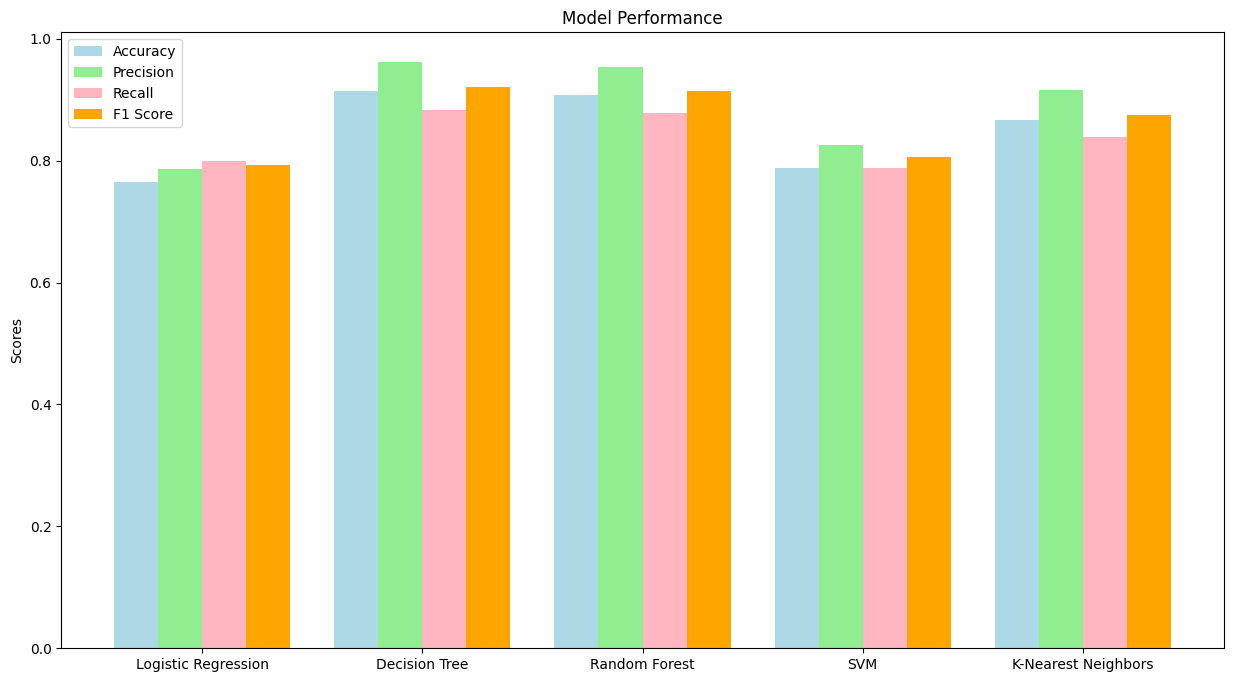

In [56]:
plt.figure(figsize=(15, 8))
bar_width = 0.2
xpos = np.arange(len(df_models['Model']))
bars1 = plt.bar(xpos - 0.3, df_models['Accuracy'], width = bar_width, label = 'Accuracy', color='lightblue')
bar2 = plt.bar(xpos - 0.1, df_models['Precision'], width = bar_width, label = 'Precision', color='lightgreen')
bar3 = plt.bar(xpos + 0.1, df_models['Recall'], width = bar_width, label = 'Recall', color='lightpink')
bar4 = plt.bar(xpos + 0.3, df_models['F1 Score'], width = bar_width, label = 'F1 Score', color='orange')
plt.xticks(xpos, df_models['Model'])
plt.ylabel('Scores')
plt.title('Model Performance')
plt.legend()

#Feature importance

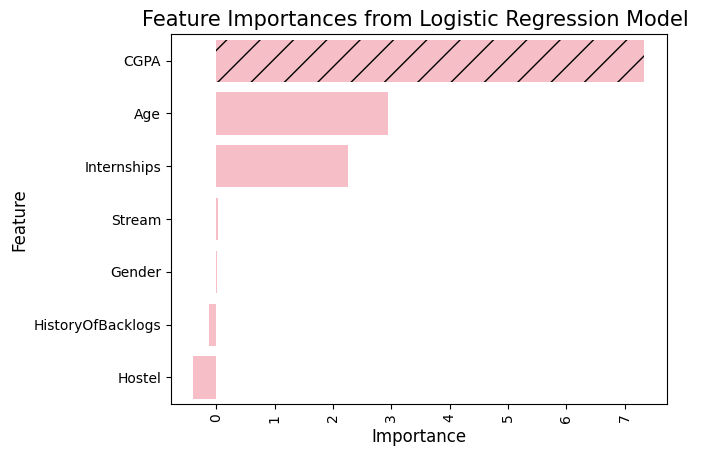

In [ ]:
LogReg.fit(X,y)
coefficients = LogReg.coef_[0]
# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': coefficients
})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
bars=sns.barplot(x='Importance',y='Feature',data=feature_importances_df,color='lightpink')
bars.patches[0].set_hatch('/')
plt.ylabel('Feature',fontsize=12)
plt.xlabel('Importance',fontsize=12)
plt.title('Feature Importances from Logistic Regression Model ',fontsize=15)
plt.xticks(rotation=90)
plt.show()

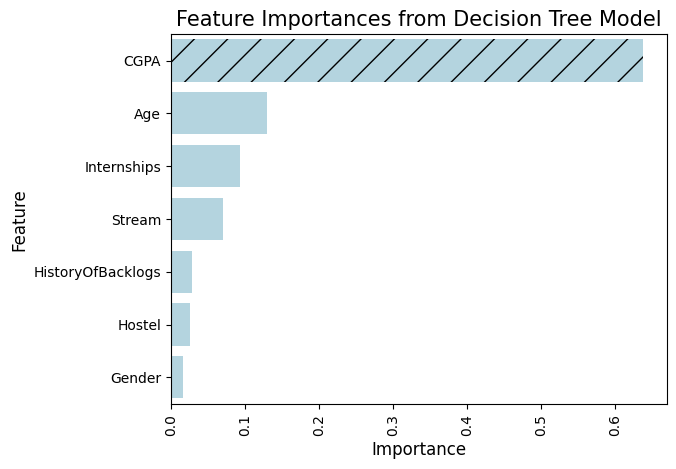

In [ ]:
Dt.fit(X,y)


# Get feature importances
feature_importances = Dt.feature_importances_

# Create a DataFrame with the feature importances
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
bars = sns.barplot(x='Importance', y='Feature', data=feature_importances_df, color='lightblue')
bars.patches[0].set_hatch('/')  # Add a hatch to the most important feature

plt.ylabel('Feature', fontsize=12)
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importances from Decision Tree Model', fontsize=15)
plt.xticks(rotation=90)
plt.show()

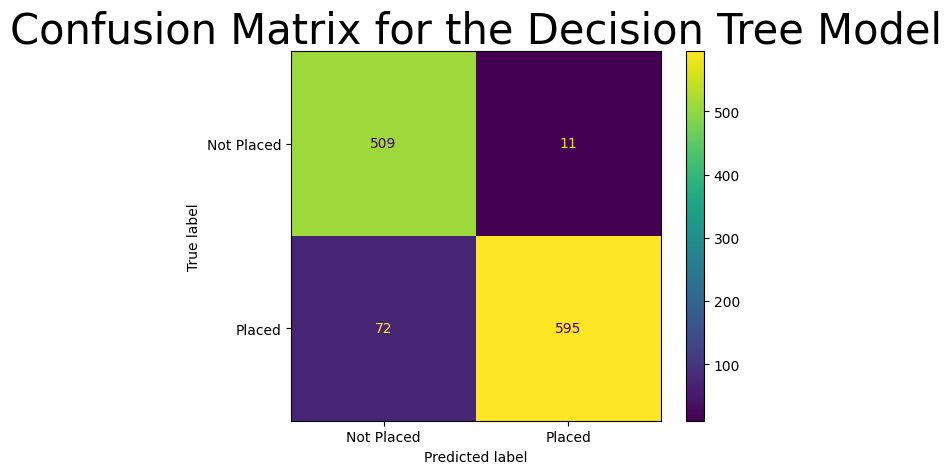

In [61]:

# Generate predictions
Dt_test_pred = Dt.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, Dt_test_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Placed', 'Placed'])
disp.plot()
plt.title("Confusion Matrix for the Decision Tree Model", fontsize= 30)
plt.show()